<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/K_Means_Clustering_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the K-Means Clustering-Part2, we have seen that K-means technique is a popular clustering techniques.
One of the very popular application of clustering is customer segmentation. Customer Segmentation is a major strategic area in the field marketing and sales management. 
According to philip Kortler-“Marketing management is the art and science of choosing target markets and getting, keeping and growing customers through creating, delivering, and communicating superior customer value.”
In order to create a superior customer values, segmenting the market into clusters of similar needs is the first step. Then the very next step is to create a unique value proposition in terms of both solution and communication for that perticular clusters-creating a unique proposition for a perticular cluster or segment  of the market is nothing but targeting and positioning.
By now we understood what is segmentation? What is Target market?. Let us take example of a Helathdrink company X. If we have define the Segment,target and positioning for that company: then at a very high level it will be like this

1. Target Market: Any body who Drinks. This is huge space and it is not feasible to understand unique proposition for this mass market 
   So we we will segment these customers into segments based on some attributes. Attributes can be Age, health preference,Gender etc based on the offering. This grouping of same needs based on some parameter is segmentation.
One way of segmenting our market of health drink can be based on age group, so the possible segments/Clusters can be 
   1.Infants
   2.Kids
   3.Teen
   4.Mid-age
   5.Old age 

K-means Clusttering can be applied to perform customer segmentation.


# Applying K-means on real dataset:
In this section, we will see how to apply K-means on [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python). 
The data set is freely available in Kaggle.com and can be downloaded from [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).
The Problem statement is given below:
we are given with mall customer database with details like Customer ID, age, gender, annual income and spending score.

Spending Score is something that is assigned by the mall authorities to each customers based on their purchasing behavior and other parameter. How they arived in the spending score is not very clear.

**Problem Statement**

Cluster the customers data so that we can send them personilised offers to increase their purchase and hence increase the reveneue.

Below code is to configure google colab, so that we can load the dataset from the google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We are importing all the necessary libraries in the below cell

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# Loading data

In [ ]:
# reading the data from csv file using pandas dataframe

data=pd.read_csv("/content/drive/MyDrive/machine_learning/data_Set/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Using pandas head() methods, we are printing the first 5 rows of the datatset.From this, we are able to understand that the datat set is having 5 features. They are CustomerID	,Gender,Age,Annual Income,Spending score. We can drop features like customer id as it not very usefull for our analysis.

In [ ]:
# Droping the customer id
data.drop(labels='CustomerID',axis=1,inplace=True)

In [ ]:
# Reviewing the dataset using head() method of pandas
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Exploratory Data Analysis:

We will try to explore further and understand the dataset.


In [ ]:
# Shape of the dataset
data.shape

(200, 4)

Checking the shape of the dataset. We found that we 200 datapoints and 4 dimensions/features.

In [ ]:
# Checking for null values 
data.isnull().values.any()

False

As sanity check, checking for Null values and found that we don't have such sinerios in this dataset.

In [ ]:
# Descriptive statistics of the features 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Using describe, we found that mean age of the 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the customers age')

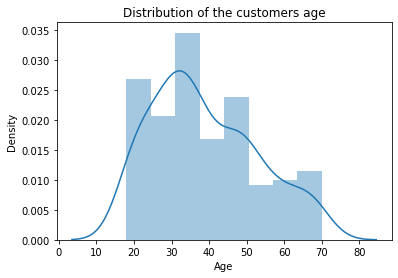

In [ ]:
# Distribution of Age, Income, spending score 
sns.distplot(data['Age'])
#sns.distplot(data['Annual Income (k$)'])
plt.xlabel("Age")

plt.title("Distribution of the customers age")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the customers Annual Income')

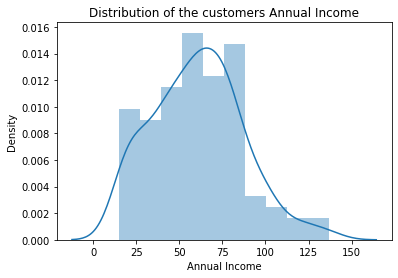

In [ ]:
# Distribution of the Income:
sns.distplot(data['Annual Income (k$)'])
plt.xlabel("Annual Income")

plt.title("Distribution of the customers Annual Income")

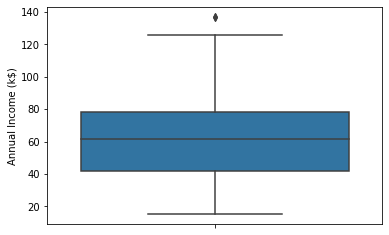

In [ ]:
# Ploting box plots on Annual Income:
sns.boxplot(y=data["Annual Income (k$)"],)


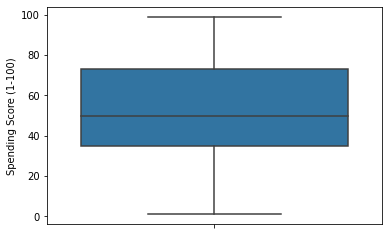

In [ ]:
sns.boxplot(y=data["Spending Score (1-100)"])

Let us count the data with respect to gender

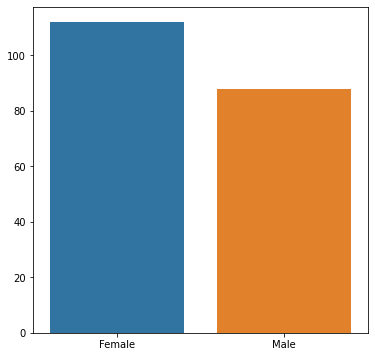

In [ ]:
Count_BYgender=data["Gender"].value_counts()
#print(Count_BYgender)
plt.figure(figsize=[6,6])
sns.barplot(x=Count_BYgender.index,y=Count_BYgender.values)

The objective of clustering in very simple  as discussed in the first part.It is minimizing the intra-cluster distance. Hence the mathametical objective function becomes :
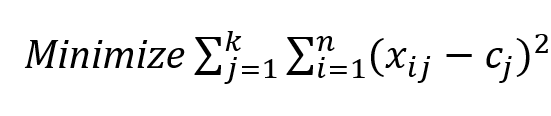









K = number of clusters
N= number of data points
C=centroid of cluster j
(xij — cj)– Distance between data point and centroid to which it is assigned
Deciding on the optimum number of clusters ‘K’
The main input for k-means clustering is the number of clusters. This is derived using the concept of minimizing within cluster sum of square (WCSS). A scree plot is created which plots the number of clusters in the X axis and the WCSS for each cluster number in the y-axis.
Image for post
Scree plot / Elbow method to determine optimum number of clusters
As the number of clusters increase, the WCSS keeps decreasing. The decrease of WCSS is initially steep and then the rate of decrease slows down resulting in an elbow plot. The number of clusters at the elbow formation usually gives an indication on the optimum number of clusters. This combined with specific knowledge of the business requirement should be used to decide on the optimum number of clusters

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


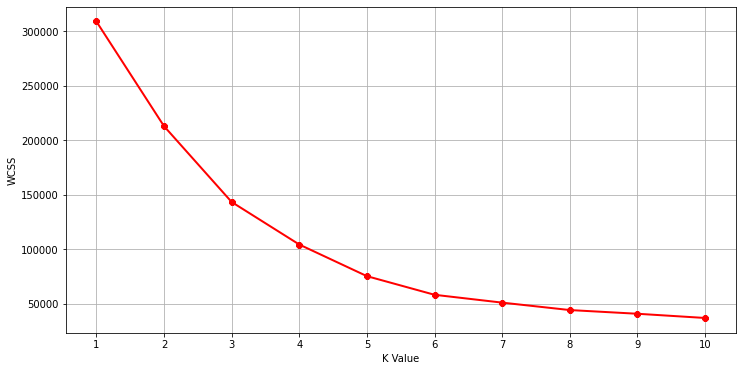

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
#The optimum k will be 4 or 5
#Fitting the Kmeans with k=4:

km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=1)
clusters=km4.fit_predict(data.iloc[:,1:])
data['label']=clusters






In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,0
4,Female,31,17,40,1


Now we can see that our label are also attached to the main dataset as we did manually in our last article. The first data point (male,19,15,39) is assigned to cluster 0.

In [ ]:
print(km4.cluster_centers_)

[[24.82142857 28.71428571 74.25      ]
 [44.89473684 48.70526316 42.63157895]
 [32.69230769 86.53846154 82.12820513]
 [40.39473684 87.         18.63157895]]


The centroids of the optimal clusters are printed above.


In [ ]:
# Now going to print the labels 
print(km4.labels_)
print(len(km4.labels_))

[0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]
200


We can see here that based on the nearest distance, points are clustered into 4 clusters.Repressented with 0,1,2,3. They are just name of the clusters and doesnot have any mathamatical significance.
As said, it is just repsentation of 200 points into thier respective clusters.




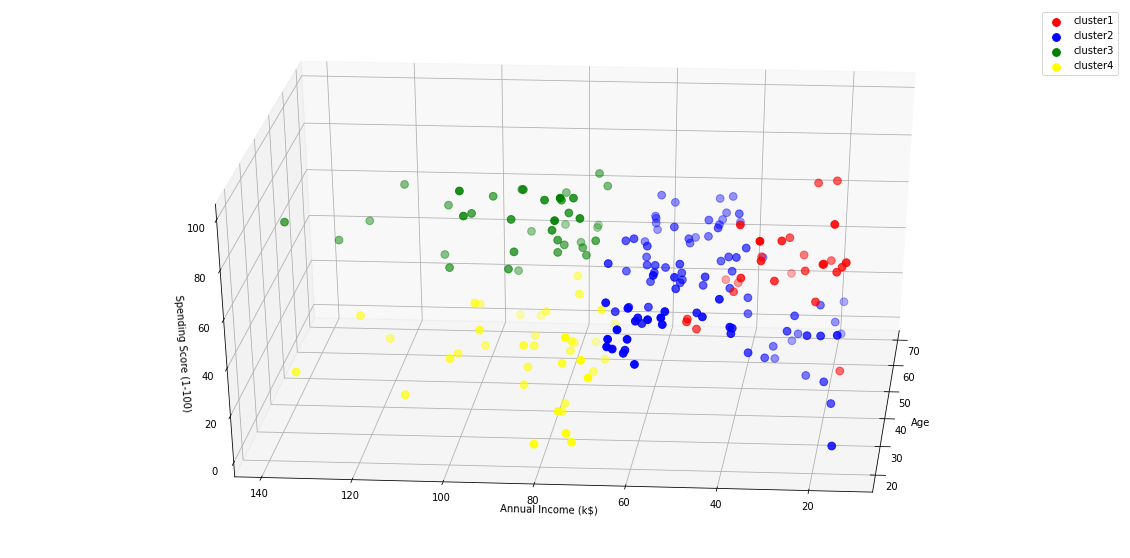

In [ ]:
#Let us plot the points in 3d scatter pl

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='red', s=60,label='cluster1')
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='blue', s=60,label='cluster2')
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60,label='cluster3')
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='yellow', s=60,label='cluster4')
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()